In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [ ]:
def get_dls(bs=64):
    dblocks = DataBlock(
        blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
        get_items=get_image_files,
        splitter=GrandparentSplitter('training', 'testing'),
        get_y=parent_label,
        batch_tfms=Normalize()
    )

    return dblocks.dataloaders(path, bs=bs)

dls = get_dls()
        

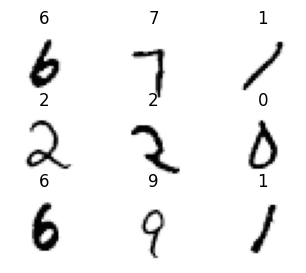

In [ ]:
dls.show_batch(max_n=9, figsize=(4,3))

In [ ]:
def simple_cnn():
    return sequential(
        conv(1, 8, ks=5),
        conv(8, 16),
        conv(16, 32),
        conv(32, 64),
        conv(64, 10, act=False),
        Flatten()
    )

In [ ]:
def fit(epochs = 1, lr=0.06):
    learn = Learner(dls, simple_cnn(), loss_func=CrossEntropyLossFlat(),
                    metrics=accuracy)
    learn.fit_one_cycle(epochs, lr)
    return learn

In [ ]:
def conv(ni, nf, ks=3, act=True):
    layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
    layers.append(nn.BatchNorm2d(nf))
    if act:
        layers.append(nn.ReLU())
    return nn.Sequential(*layers)
learn = fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.121393,0.083734,0.971700,00:34
1,0.044567,0.029667,0.990100,00:33


In [ ]:
(path/'testing'/'7').ls()[:3]

(#3) [Path('/root/.fastai/data/mnist_png/testing/7/9186.png'),Path('/root/.fastai/data/mnist_png/testing/7/2888.png'),Path('/root/.fastai/data/mnist_png/testing/7/8786.png')]

<Axes: >

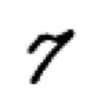

In [ ]:
tst_im = Image.open(path/'testing'/'7'/'9186.png')
show_image(tst_im, cmap='Greys')

In [ ]:
prd = learn.predict(tst_im)
prd

('7',
 tensor(7),
 tensor([2.4997e-06, 1.9566e-05, 3.6361e-07, 8.6068e-07, 8.7293e-07, 1.3509e-06,
         1.7152e-07, 9.9997e-01, 8.0235e-08, 6.3048e-07]))

In [ ]:
prd[2].sum()

tensor(1.)

In [ ]:
dls.to??

Signature: dls.to(device)
Docstring: Use `device`
Source:   
    def to(self, 
        device # Device to put `DataLoaders`
    ):
        self.device = device
        return self
File:      /home/sagar/git/fastai/fastai/data/core.py
Type:      method

In [ ]:
path.owner

<bound method Path.owner of Path('/root/.fastai/data/mnist_png')>